In [98]:
import re
import networkx as nx
from networkx.readwrite import json_graph
from fourlang.text_to_4lang import TextTo4lang
from graphviz import Source
from parse_data import read
from similarity import *

In [99]:
data_frame = read("it")

In [100]:
index = 2
premise = data_frame.premise[index]
hypothesis = data_frame.hypothesis[index]
score = data_frame.graded[index]

In [101]:
text_to_4lang = TextTo4lang(lang="it")

In [102]:
graph_premise = text_to_4lang.process_text(premise, True) #legyen-e expand
graph_hypothesis = text_to_4lang.process_text(hypothesis, True) #legyen-e expand

In [103]:
dot_graph_premise = graph_premise.to_dot()
dot_graph_hypothesis = graph_hypothesis.to_dot()

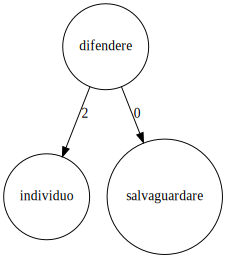

In [104]:
Source(dot_graph_premise)

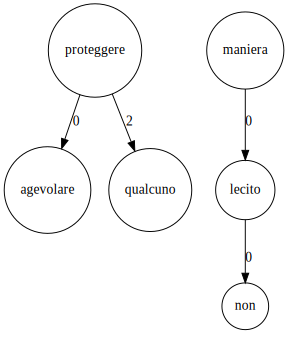

In [105]:
Source(dot_graph_hypothesis)

In [106]:
asim_jac_edges(graph_hypothesis, graph_premise), score

(0, 5.5)

In [107]:
asim_jac_nodes(graph_hypothesis, graph_premise), score

(0, 5.5)